# Symbolic mathematics and computation

https://docs.sympy.org/

In [1]:
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## An example

Consider the computation of $\frac{1}{2} + \frac{1}{3}$

Doing this manually, we know the answer is $\frac{5}{6}$.

In sympy, Rational is a rational number consisting of an integer numerator and an integer denominator.

In [2]:
a, b = sym.Rational(1, 2), sym.Rational(1,3)

In [3]:
a, b

(1/2, 1/3)

In [4]:
a + b

5/6

In [5]:
type(a)

sympy.core.numbers.Half

In [6]:
a**2

1/4

## Evaluate a formula to a floating number number

In [7]:
sym.pi.evalf?

Signature:
sym.pi.evalf(
    n=15,
    subs=None,
    maxn=100,
    chop=False,
    strict=False,
    quad=None,
    verbose=False,
)
Docstring:
Evaluate the given formula to an accuracy of n digits.
Optional keyword arguments:

    subs=<dict>
        Substitute numerical values for symbols, e.g.
        subs={x:3, y:1+pi}. The substitutions must be given as a
        dictionary.

    maxn=<integer>
        Allow a maximum temporary working precision of maxn digits
        (default=100)

    chop=<bool>
        Replace tiny real or imaginary parts in subresults
        by exact zeros (default=False)

    strict=<bool>
        Raise PrecisionExhausted if any subresult fails to evaluate
        to full accuracy, given the available maxprec
        (default=False)

    quad=<str>
        Choose algorithm for numerical quadrature. By default,
        tanh-sinh quadrature is used. For oscillatory
        integrals on an infinite interval, try quad='osc'.

    verbose=<bool>
        Print d

In [8]:
sym.pi

pi

In [9]:
sym.pi.evalf()

3.14159265358979

In [10]:
sym.pi + sym.exp(1)

E + pi

In [11]:
(sym.pi + sym.exp(1)).evalf()

5.85987448204884

In [12]:
np.pi + np.exp(1)

5.859874482048838

### Example: calculate $\sqrt{2}$ to 100 decimals

In [13]:
sym.sqrt(2)

sqrt(2)

In [14]:
sym.sqrt(2).evalf()

1.41421356237310

In [15]:
sym.sqrt(2).evalf(n=100)

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573

## Symbols

In [16]:
x = sym.Symbol('x')
y = sym.Symbol('y')

In [17]:
type(x)

sympy.core.symbol.Symbol

In [18]:
x + y + x - y

2*x

In [19]:
(x+y) ** 2

(x + y)**2

Setting the printint format

In [20]:
sym.init_printing(use_unicode=False, wrap_line=True)

## Algebraic manipulations

### Expand

In [21]:
sym.expand((x + y) ** 3)

In [22]:
3 * x * y ** 2 + 3 * y * x ** 2 + x ** 3 + y ** 3

In [23]:
type(x), type(y)

(sympy.core.symbol.Symbol, sympy.core.symbol.Symbol)

The same does not work for arbitrary Python variables, e.g.

In [24]:
# 3 * p * q ** 2 + 3 * q * p ** 2 + p ** 3 + q ** 3

### Complex variables

Let $x$ and $y$ be complex varilables, i.e.

$$ x = Re(x) + i Im(x)$$
$$ y = Re(x) + i Im(y)$$

where $Re()$ and $Im()$ are the real and imaginary parts of a complex number, respectively.

For example,

$$ x = 2 + 3 i$$

where $i = \sqrt{-1}$. $Re(x)=2$. $Im(x)=3$.

In [25]:
sym.expand(x + y, complex=True)

In [26]:
sym.I * (x + y)

Example: what is $i * Im(x) + i * Im(y) + Re(x) + Re(y)$:

In [27]:
sym.I * sym.im(x) + sym.I * sym.im(y) + sym.re(x) + sym.re(y)

### Trigometry

$$ \cos(x+y) = -\sin(x)\sin(y) + \cos(x)\cos(y) $$

In [28]:
sym.expand(sym.cos(x + y), trig=True)

In [29]:
# The "trig" option above was necessary, otherwise:
f = sym.expand(sym.cos(x + y))
f

In [30]:
f2 = sym.cos(x) * sym.cos(y) - sym.sin(x) * sym.sin(y)
f2

#### Example

Evalue $\cos(x+y)$ at $x = \frac{\pi}{4}$ and $y=\frac{\pi}{4}$. 

From manual calculation:

$\cos(x+y) = \cos(\frac{\pi}{4} + \frac{\pi}{4}) = \cos(\frac{\pi}{2})$

In [31]:
f = sym.expand(sym.cos(x+y))
f.evalf(subs={'x': np.pi/4, 'y': np.pi/4})

In [32]:
f.evalf(subs={'x': np.pi/4, 'y': np.pi/4}, n=40)

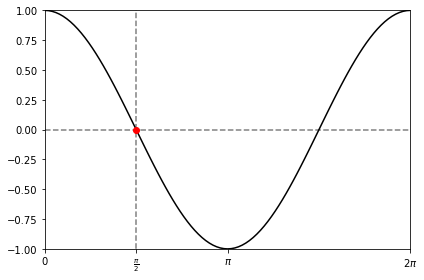

In [33]:
# Recall how cos(x) looks like
def plot_cos():
    t = np.linspace(0, 2*np.pi, 101)
    plt.plot(t, np.cos(t), 'k-')
    t0 = [0.5*np.pi]
    plt.plot(t0,np.cos(t0), 'ro')
    plt.xlim((0, 2*np.pi))
    plt.ylim((-1,1))
    plt.xticks([0, np.pi/2, np.pi, 2*np.pi], ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$2\pi$'])
    plt.vlines(0.5*np.pi, -2, 2, colors='gray', linestyles='dashed')
    plt.hlines(0, 0, 2*np.pi, colors='gray', linestyles='dashed')
    plt.tight_layout()
plot_cos()

### Simplify

Example:

$$ \frac{x + xy }{x} = y+1$$ 

In [34]:
sym.simplify((x + x * y) / x)

Example: $$\frac{x^2 + x^3 y}{x^2} = y+1$$

In [35]:
sym.simplify((x**2 + x**3 * y) / x**2)

Exercises

$$(x+y)^6$$

In [36]:
sym.expand((x+y)**6)

$$\frac{\sin(x) }{\cos(x)}$$

In [37]:
sym.simplify(sym.sin(x)/sym.cos(x))

## Calculus

### limits

Example:

Consider the limit

$$\lim_{x\rightarrow 0}\frac{\sin(x)}{x}$$

To do this by hand, one can apply the L'Hospital's rule [1] to get

$$\lim_{x\rightarrow 0}\frac{\sin(x)}{x} = \lim_{x\rightarrow 0} \cos(x) = \cos(0) = 1$$

[1] https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule#:~:text=In%20mathematics%2C%20more%20specifically%20calculus,be%20easily%20evaluated%20by%20substitution.

In [38]:
sym.limit(sym.sin(x) / x, x, 0)

### Infinity

$\infty$ is `sympy.oo`

Example:

$$\lim_{x\rightarrow \infty}\frac{1}{x} = 0$$

In [39]:
sym.limit(1/x, x, sym.oo)

In [40]:
sym.limit(1/x, x, 2)

In [41]:
f = sym.limit(1/x, x, 2)
type(f)

sympy.core.numbers.Half

In [42]:
# to get the numerical value:

f.evalf()

## Differentiation

Example

$$\frac{d}{dx}\cos(x) = -\sin(x)$$
$$\frac{d}{dx}\sin(x) = \cos(x)$$

In [43]:
sym.diff(sym.sin(x), x)

In [44]:
sym.diff(sym.cos(x), x)

Example

$$f = \log (x ^ 2 + 1) $$
$$\frac{df}{dx} = ?$$

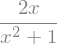

In [45]:
sym.diff(sym.log( x**2 + 1), x)

Example

$$f = \log (x ^ 2 + y^2 + 1) $$
$$\frac{\partial f}{\partial x} = ?$$
$$\frac{\partial f}{\partial y} = ?$$

In [46]:
f = sym.log(x**2 + y**2 + 1)

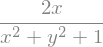

In [47]:
sym.diff(f, x)

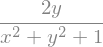

In [48]:
sym.diff(f, y)

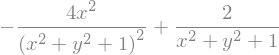

In [49]:
# take derivative again

fx = sym.diff(f, x)
sym.diff(fx,x)

Take higher order derivative

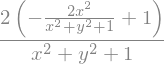

In [50]:
sym.diff(f,x,2)

If we also "simplify" the results:

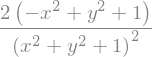

In [51]:
sym.diff(fx,x).simplify()

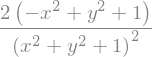

In [52]:
sym.diff(f,x,2).simplify()

## Series expansion

Example:

Series expansion of $\cos(x)$

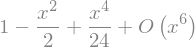

In [53]:
sym.series(sym.cos(x), x)

## Evaluating the symbolic expressions

We already know how to use `evalf()` to evaluate an expression at a point.

Consider evaluating the following formula at $x=17$ and $y=42$:

In [54]:
x, y = sym.symbols('x y')
f = 3*x**2 + sym.log(x**2 + y**2 + 1)
f

One way to do this is using `evalf()`:

In [55]:
%timeit f.subs({x: 17, y: 42}).evalf()

148 µs ± 598 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Use `sympy.lamdify`:

In [56]:
g = sym.lambdify([x,y], f, modules=['math'])
g(17, 42)

It is significantly faster than the `evalf()` method:

In [57]:
%timeit g(17,42)

814 ns ± 6.68 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Example:

Plot the first and second derivates of $f$:

$$ f(x) = \exp(\frac{-(x+c)^2}{\sigma^2})$$

In [58]:
x = sym.Symbol('x')
c = sym.Symbol('c')
s = sym.Symbol('sigma')
x, c, s

In [59]:
f = sym.exp(-(x+c)**2/s**2)
f

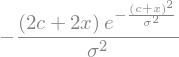

In [60]:
# derivative of f
f1 = sym.diff(f, x)
f1

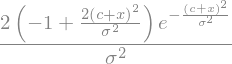

In [61]:
f2 = sym.diff(f, x, 2)
f2

In [62]:
# make a function
func  = sym.lambdify([x, c, s], f )
func1 = sym.lambdify([x, c, s], f1)
func2 = sym.lambdify([x, c, s], f2)

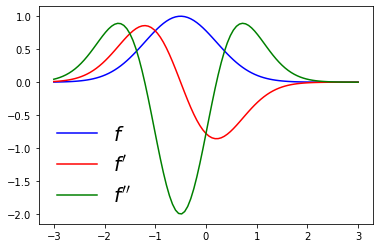

In [63]:
cc = 0.5
ss = 1.0
t = np.linspace(-3, 3, 101)
plt.plot(t, func(t, cc,ss), 'b-', label=r'$f$')
plt.plot(t, func1(t,cc,ss), 'r-', label=r"$f'$")
plt.plot(t, func2(t,cc,ss), 'g-', label=r"$f''$")
plt.legend(fontsize=20, frameon=False)

## Integratioin

An example

$$f(x) = x^2 + x + 1$$

$$\int f(x)dx = \frac{x^3}{3} + \frac{x^2}{2} + x + c$$

In [64]:
x = sym.Symbol('x')
f = x**2 + x + 1
f

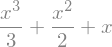

In [65]:
sym.integrate(f)

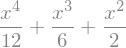

In [66]:
# integreate f twice
fi = sym.integrate(f)
sym.integrate(fi)

In [67]:
# integrate of sin(x)

sym.integrate(sym.sin(x), x)

### Integration over an interval

Consider

$$ \int_{0}^{\pi/2} \cos(x) dx $$

Analytically, the integration is:

$$ \sin(\pi/2) - \sin(0) = 1 $$

In [68]:
x = sym.Symbol('x')
f = sym.cos(x)
x, f

In [69]:
sym.integrate(f, x)

In [70]:
sym.integrate(f, (x, 0, np.pi/2))

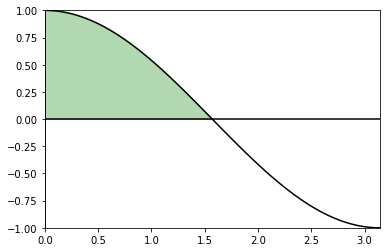

In [71]:
t = np.linspace(0, np.pi, 101)
t2 = np.linspace(0, np.pi/2, 101)
plt.plot(t, np.cos(t), 'k-')
plt.fill_between(t2, np.cos(t2), np.zeros(t2.shape[0]), color='green',alpha=0.3)
plt.vlines(0, -1, 1)
plt.hlines(0, 0, np.pi)
plt.xlim((0, np.pi))
plt.ylim((-1, 1))

### Example

Consider

$$ f(x) = \exp(-x)$$

$$ g(x) = \exp(-x^2)$$

Analytically, we know (e.g. from Calculus textbooks):

$$ \int f(x)dx = -\exp(-x)$$

$$ \int g(x)dx = \frac{\sqrt{\pi} erf(x)}{2}$$

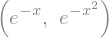

In [72]:
x = sym.Symbol('x')
f = sym.exp(-x)
g = sym.exp(-x**2)
f, g

In [73]:
fi = sym.integrate(f, x)
fi

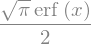

In [74]:
gi = sym.integrate(g, x)
gi

where $erf(x)$ is the error function. See https://en.wikipedia.org/wiki/Error_function

In [75]:
ffunc  = sym.lambdify([x], f)
gfunc  = sym.lambdify([x], g)
gifunc = sym.lambdify([x], gi)
fifunc = sym.lambdify([x], fi)

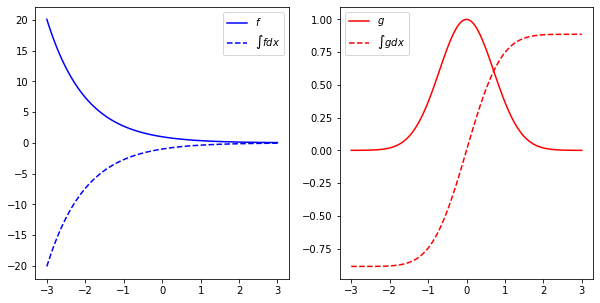

In [76]:
t = np.linspace(-3, 3, 101)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t, ffunc(t), 'b-', label=r'$f$')
plt.plot(t, fifunc(t), 'b--', label=r'$\int f dx$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t, gfunc(t), 'r-', label=r'$g$')
plt.plot(t, gifunc(t), 'r--', label=r'$\int g dx$')
plt.legend()

Exercises

1. What is $\int_{-\infty}^{\infty} \exp(-x^2) dx$?
2. What is $\int_{0}^{\infty} \exp(-x) dx$?

## Solving equations

Example

Find the solution of $$x^4 = x$$

Or equivalently, the solution of $f(x)=0$ where $f(x) = x^4 - x$.

Graphically, this is the intersecton of two curves $y=x$ and $y=x^4$:

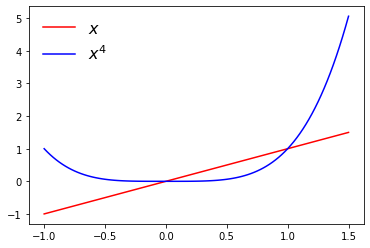

In [77]:
t = np.linspace(-1, 1.5, 101)
plt.plot(t, t, 'r-', label=r'$x$')
plt.plot(t, t**4, 'b-', label=r'$x^4$')
plt.legend(fontsize=16, frameon=False)

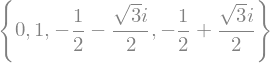

In [78]:
x = sym.Symbol('x')
f = x**4 - x
sym.solveset(f, x)

In [79]:
# If we are only interested in the real domain

xsol = sym.solveset(f, x, domain=sym.Reals)
xsol

In [80]:
xlist = np.array([x.evalf() for x in xsol])

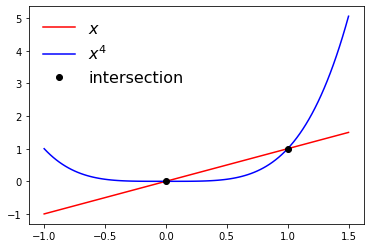

In [81]:
plt.plot(t, t, 'r-', label=r'$x$')
plt.plot(t, t**4, 'b-', label=r'$x^4$')
plt.plot(xlist, xlist, 'ko', label='intersection')
plt.legend(fontsize=16, frameon=False)

## Solving systems of equations

Consider

$$ x + 5y = 2 $$
$$ -3x + 6y = 16$$

In [82]:
x = sym.Symbol('x')
y = sym.Symbol('y')
sol = sym.solve((x + 5*y - 2, -3*x + 6*y -16), (x,y))

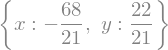

In [83]:
sol

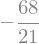

In [84]:
sol[x]

In [85]:
sol[y]

In [86]:
type(sol[x])

sympy.core.numbers.Rational

In [87]:
sol[x].evalf()

In [88]:
solf = np.array([sol[t].evalf() for t in sol], dtype='float')
solf

array([-3.23809524,  1.04761905])

Graphically, this can be intepreted as:

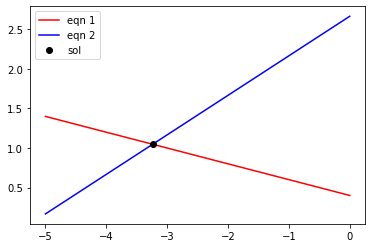

In [89]:
t = np.linspace(-5, 0, 101)
plt.plot(t, (2-t)/5, 'r-', label='eqn 1')
plt.plot(t, (3*t+16)/6, 'b-', label='eqn 2')
plt.plot([solf[0]], [solf[1]], 'ko', label='sol')
plt.legend()

#### Exercise:

Solve the system of equations:

$$ x + y = 2$$
$$ 2x + y = 0$$

## Linear algebra (symbolic)

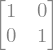

In [90]:
A = sym.Matrix([[1,0], [0,1]])
A

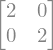

In [91]:
A * 2

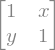

In [92]:
x = sym.Symbol('x')
y = sym.Symbol('y')
A = sym.Matrix([[1, x], [y, 1]])
A

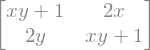

In [93]:
Asq = A**2
Asq

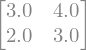

In [94]:
Asq.evalf(subs={'x': 2, 'y':1})

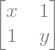

In [95]:
B = sym.Matrix([[x, 1], [1, y]])
B

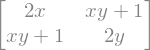

In [96]:
A * B

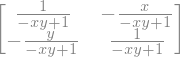

In [97]:
A.inv()

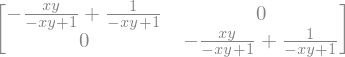

In [98]:
AA = A * A.inv()
AA

In [99]:
np.matrix(AA)

matrix([[-x*y/(-x*y + 1) + 1/(-x*y + 1), 0],
        [0, -x*y/(-x*y + 1) + 1/(-x*y + 1)]], dtype=object)

## Differential equations

Consider the differential equations:

$$ \frac{dy}{dt} = - \lambda y$$

subject to the initial condition $y(0)=3$ and $\lambda=1.78$.

### Solve symbolically

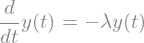

In [100]:
# set up the equation

t, l = sym.symbols('t lambda')
y = sym.Function('y')(t)
dydt = y.diff(t)
eqn = sym.Eq(dydt, -l*y)
eqn

In [101]:
sym.dsolve(eqn)

The initial condition $y(0)=3$ gives: $C_1 = 3$. So the analytical solution is $y(t)=3\exp(-\lambda t)$.

### Solve numerically


In [102]:
from scipy import integrate

def rhs(y, t, const):
    return -const * y

y0 = 3
params = (1.78,)
t = np.linspace(0, 3, 21)
sol = integrate.odeint(rhs, y0, t, args=params)[:,0]

# the analytic solution
def analytical(t, const):
    return 3*np.exp(-const * t);

ya = analytical(t, params[0])

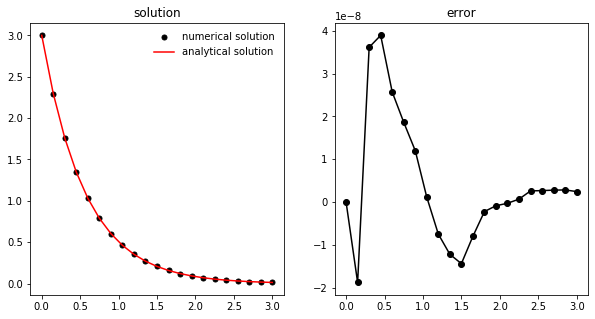

In [103]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('solution')
plt.plot(t, sol, 'ko', markersize=5, label='numerical solution')
plt.plot(t, analytical(t, params[0]), 'r-', label='analytical solution')
plt.legend(frameon=False)

plt.subplot(1,2,2)
plt.title('error')
plt.plot(t, sol-ya, 'ko-') # note the range

#### Exammple

Consider the Van der Pol oscillator, which is the base of some models in biology and  seismology:

$$ y'' - \mu (1-y^2) y' + y = 0 $$

This second order differential equation can be transformed into a system of first order equations:

$$ y_0' = y_1 $$
$$ y_1' = \mu (1-y_0^2)y_1 - y_0 $$

#### Solve symbolically

In [104]:
y = y0, y1 = sym.symbols('y0 y1')

In [105]:
y

In [106]:
mu = sym.symbols('mu')
mu

In [107]:
def rhs(y, t, mu):
    return [
        y[1],
        mu*(1-y[0]**2)*y[1] - y[0]
    ]

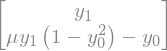

In [108]:
R = sym.Matrix(rhs(y, None, mu))
R

In `integrate.odeint()`, there is a option `Dfun` that define the Jacobian of the right-hand-side of the ODE:

```
Dfun : callable(y, t, ...) or callable(t, y, ...)
    Gradient (Jacobian) of `func`.
    If the signature is ``callable(t, y, ...)``, then the argument
    `tfirst` must be set ``True``.
```

Jacobian is the matrix:
$$
J = 
\begin{bmatrix}
\frac{\partial R_o}{\partial y_0} & \frac{\partial R_o}{\partial y_1} \\
\frac{\partial R_1}{\partial y_0} & \frac{\partial R_1}{\partial y_1}
\end
{bmatrix}$$

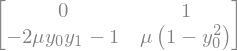

In [109]:
J = R.jacobian(y)
J

In [110]:
def J_func(y, t, mu):
    return np.array([
        [0, 1],
        [-1-2*mu*y[0]*y[1], mu*(1-y[0]**2)] 
    ])

In [111]:
# parameters
y_init, params = [1, 0], (17,)
t = np.linspace(0, 200, 1024)

In [112]:
# depends on odeint's default (finite difference approximatation of Jacobians)
sol_F, info_F = integrate.odeint(rhs, y_init, t, params, full_output=True)

In [113]:
# Use analytic Jacobians
sol_J, info_J = integrate.odeint(rhs, y_init, t, params, Dfun=J_func, full_output=True)

In [114]:
info_F['nfe'][-1], info_F['nje'][-1]

(9113, 206)

In [115]:
info_J['nfe'][-1], info_J['nje'][-1]

(8693, 218)

In [116]:
integrate.odeint?

Signature:
integrate.odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the 